# ANÁLISIS RANDOM FOREST

### Importación de librerías y apertura de Dataframe

In [1]:
# Importar librerías 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# reset rc params to defaults
sns.reset_orig()

In [2]:
import statsmodels.stats.api as sms # Para la regresión y validación de supuestos ejecutamos el statsmodels
import statsmodels.api as sm # Submódulo de statsmodels que son las estadisticas "stats"
from statsmodels.formula.api import ols # La fórmula api de statsmodel permite seguir la notación antes revisada
from statsmodels.compat import lzip # Módulo para las pruebas de hipótesis.

In [3]:
# Importamos un archivo csv a un DataFrame en pandas
df = pd.read_csv('BDTICMODEL.csv', encoding='ISO-8859-1')
df

,des_tamano,tic1_2,tic1_3a,tic1_3b,tic1_3c,tic1_3d,tic2_1,tic2_2_1a,tic2_2_1b,tic2_2_1c,...,tic5_1d,tic5_1f,tic5_1h,tic6_1,tic6_2a,tic6_2b,tic6_2c,AÃ±o,Total_Personal,Total_Espec
0,2,3481,0,3481,0,0,1,2,2,1,...,2,2,2,2,2,2,1,2016,2,0
1,0,1200,600,360,240,0,1,1,2,2,...,2,2,1,2,2,2,1,2016,2,0
2,2,4761,4761,0,0,0,1,2,2,1,...,1,1,1,2,2,2,1,2016,8,0
3,2,31598,31598,0,0,0,1,2,1,2,...,2,1,2,2,2,2,1,2016,1,0
4,1,101277,101277,0,0,0,1,2,2,1,...,2,1,2,2,2,2,1,2016,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14024,0,33388,0,33388,0,0,1,2,2,1,...,1,1,1,2,2,1,2,2021,3,0
14025,0,26819,16359,10459,0,0,1,2,2,1,...,2,1,1,1,2,2,1,2021,21,1
14026,1,10506,10506,0,0,0,1,2,2,1,...,2,1,2,2,2,2,1,2021,60,0
14027,0,2182,196,1985,0,0,1,2,2,1,...,2,1,2,2,2,1,2,2021,22,0


In [4]:
print(df.dtypes)

des_tamano        int64
tic1_2            int64
tic1_3a           int64
tic1_3b           int64
tic1_3c           int64
tic1_3d           int64
tic2_1            int64
tic2_2_1a         int64
tic2_2_1b         int64
tic2_2_1c         int64
tic2_3            int64
tic2_6a           int64
tic2_6b           int64
tic2_6c           int64
tic2_6d           int64
tic2_6f           int64
tic2_6g           int64
tic2_6h           int64
tic2_6i           int64
tic2_6k           int64
tic2_8            int64
tic2_8_2b         int64
tic2_8_2c         int64
tic3_1            int64
tic3_1_2b         int64
tic3_1_2c         int64
tic3_1_2d         int64
tic3_1_2e         int64
tic3_1_2f         int64
tic3_2            int64
tic4_1a           int64
tic4_1b           int64
tic4_1d           int64
tic4_1e           int64
tic4_2a           int64
tic4_2b           int64
tic4_2c           int64
tic4_2d           int64
tic4_2e           int64
tic4_4a           int64
tic4_4b           int64
tic4_4c         

In [5]:
df.head()

,des_tamano,tic1_2,tic1_3a,tic1_3b,tic1_3c,tic1_3d,tic2_1,tic2_2_1a,tic2_2_1b,tic2_2_1c,...,tic5_1d,tic5_1f,tic5_1h,tic6_1,tic6_2a,tic6_2b,tic6_2c,AÃ±o,Total_Personal,Total_Espec
0,2,3481,0,3481,0,0,1,2,2,1,...,2,2,2,2,2,2,1,2016,2,0
1,0,1200,600,360,240,0,1,1,2,2,...,2,2,1,2,2,2,1,2016,2,0
2,2,4761,4761,0,0,0,1,2,2,1,...,1,1,1,2,2,2,1,2016,8,0
3,2,31598,31598,0,0,0,1,2,1,2,...,2,1,2,2,2,2,1,2016,1,0
4,1,101277,101277,0,0,0,1,2,2,1,...,2,1,2,2,2,2,1,2016,3,0


### Análisis de valores perdidos, nulos, etc

In [6]:
df.isnull().sum()

des_tamano        0
tic1_2            0
tic1_3a           0
tic1_3b           0
tic1_3c           0
tic1_3d           0
tic2_1            0
tic2_2_1a         0
tic2_2_1b         0
tic2_2_1c         0
tic2_3            0
tic2_6a           0
tic2_6b           0
tic2_6c           0
tic2_6d           0
tic2_6f           0
tic2_6g           0
tic2_6h           0
tic2_6i           0
tic2_6k           0
tic2_8            0
tic2_8_2b         0
tic2_8_2c         0
tic3_1            0
tic3_1_2b         0
tic3_1_2c         0
tic3_1_2d         0
tic3_1_2e         0
tic3_1_2f         0
tic3_2            0
tic4_1a           0
tic4_1b           0
tic4_1d           0
tic4_1e           0
tic4_2a           0
tic4_2b           0
tic4_2c           0
tic4_2d           0
tic4_2e           0
tic4_4a           0
tic4_4b           0
tic4_4c           0
tic4_4d           0
tic4_4e           0
tic4_4f           0
tic4_4g           0
tic4_4h           0
tic5_1a           0
tic5_1b           0
tic5_1d           0


In [7]:
# Eliminamos la variable tic2_1 ya que solo contiene un valor único que es "1"

df = df.drop('tic2_1', axis=1)

### Limpieza de valores perdidos, nulos, etc

### Identificación  del tipo de Datos

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14029 entries, 0 to 14028
Data columns (total 58 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   des_tamano      14029 non-null  int64
 1   tic1_2          14029 non-null  int64
 2   tic1_3a         14029 non-null  int64
 3   tic1_3b         14029 non-null  int64
 4   tic1_3c         14029 non-null  int64
 5   tic1_3d         14029 non-null  int64
 6   tic2_2_1a       14029 non-null  int64
 7   tic2_2_1b       14029 non-null  int64
 8   tic2_2_1c       14029 non-null  int64
 9   tic2_3          14029 non-null  int64
 10  tic2_6a         14029 non-null  int64
 11  tic2_6b         14029 non-null  int64
 12  tic2_6c         14029 non-null  int64
 13  tic2_6d         14029 non-null  int64
 14  tic2_6f         14029 non-null  int64
 15  tic2_6g         14029 non-null  int64
 16  tic2_6h         14029 non-null  int64
 17  tic2_6i         14029 non-null  int64
 18  tic2_6k         14029 non-

### Identificación de valores únicos

In [9]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Valores únicos para la columna '{column}':")
    print(unique_values)
    print()  # Línea en blanco para separar los resultados de cada columna

Valores únicos para la columna 'des_tamano':
[2 0 1]

Valores únicos para la columna 'tic1_2':
[ 3481  1200  4761 ... 33388 10506  2182]

Valores únicos para la columna 'tic1_3a':
[    0   600  4761 ...  1931 16359 10506]

Valores únicos para la columna 'tic1_3b':
[ 3481   360     0 ... 33388 10459  1985]

Valores únicos para la columna 'tic1_3c':
[    0   240   177 ...  9980  9280 17838]

Valores únicos para la columna 'tic1_3d':
[    0  2532   858 ... 14504 42277  2361]

Valores únicos para la columna 'tic2_2_1a':
[2 1]

Valores únicos para la columna 'tic2_2_1b':
[2 1]

Valores únicos para la columna 'tic2_2_1c':
[1 2]

Valores únicos para la columna 'tic2_3':
[1 2]

Valores únicos para la columna 'tic2_6a':
[1 2]

Valores únicos para la columna 'tic2_6b':
[1 2]

Valores únicos para la columna 'tic2_6c':
[2 1]

Valores únicos para la columna 'tic2_6d':
[2 1]

Valores únicos para la columna 'tic2_6f':
[2 1]

Valores únicos para la columna 'tic2_6g':
[2 1]

Valores únicos para la colu

Valores únicos para la columna 'tic4_4b':
[2 1]

Valores únicos para la columna 'tic4_4c':
[2 1]

Valores únicos para la columna 'tic4_4d':
[2 1]

Valores únicos para la columna 'tic4_4e':
[2 1]

Valores únicos para la columna 'tic4_4f':
[2 1]

Valores únicos para la columna 'tic4_4g':
[2 1]

Valores únicos para la columna 'tic4_4h':
[2 1]

Valores únicos para la columna 'tic5_1a':
[1 2]

Valores únicos para la columna 'tic5_1b':
[1 2]

Valores únicos para la columna 'tic5_1d':
[2 1]

Valores únicos para la columna 'tic5_1f':
[2 1]

Valores únicos para la columna 'tic5_1h':
[2 1]

Valores únicos para la columna 'tic6_1':
[2 1]

Valores únicos para la columna 'tic6_2a':
[2 1]

Valores únicos para la columna 'tic6_2b':
[2 1]

Valores únicos para la columna 'tic6_2c':
[1 2]

Valores únicos para la columna 'AÃ±o':
[2016 2017 2018 2019 2020 2021]

Valores únicos para la columna 'Total_Personal':
[   2    8    1 ... 6102  652 1326]

Valores únicos para la columna 'Total_Espec':
[   0   33   

### Resumen estadístico

In [10]:
df.describe()

,des_tamano,tic1_2,tic1_3a,tic1_3b,tic1_3c,tic1_3d,tic2_2_1a,tic2_2_1b,tic2_2_1c,tic2_3,...,tic5_1d,tic5_1f,tic5_1h,tic6_1,tic6_2a,tic6_2b,tic6_2c,AÃ±o,Total_Personal,Total_Espec
count,14029.000000,1.402900e+04,1.402900e+04,1.402900e+04,1.402900e+04,1.402900e+04,14029.000000,14029.000000,14029.000000,14029.000000,...,14029.000000,14029.000000,14029.000000,14029.000000,14029.000000,14029.000000,14029.000000,14029.000000,14029.000000,14029.000000
mean,0.254045,2.874401e+05,9.553790e+04,1.148728e+05,1.383361e+04,6.319547e+04,1.870269,1.869698,1.101290,1.398674,...,1.694419,1.310856,1.488559,1.429610,1.760425,1.791218,1.427757,2018.415283,252.475658,4.715233
std,0.546823,4.469226e+06,1.221233e+06,3.147217e+06,1.439858e+05,2.186517e+06,0.336020,0.336647,0.301723,0.489643,...,0.460670,0.462861,0.499887,0.495038,0.426839,0.406453,0.494771,1.677153,611.648955,47.432295
min,0.000000,1.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2016.000000,0.000000,0.000000
25%,0.000000,4.143000e+03,2.200000e+03,0.000000e+00,0.000000e+00,0.000000e+00,2.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2017.000000,42.000000,0.000000
50%,0.000000,1.516300e+04,8.298000e+03,0.000000e+00,0.000000e+00,0.000000e+00,2.000000,2.000000,1.000000,1.000000,...,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2018.000000,92.000000,1.000000
75%,0.000000,6.401600e+04,3.036800e+04,0.000000e+00,0.000000e+00,0.000000e+00,2.000000,2.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2020.000000,223.000000,3.000000
max,2.000000,3.202191e+08,7.905671e+07,3.170170e+08,6.683836e+06,2.419123e+08,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2021.000000,10634.000000,3509.000000


# ------------------------------------------------------------

# ----------------------------------------------------

In [11]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [12]:
# The input and output features preparation

In [13]:
# The input features
X = df.drop(['tic1_2'], axis=1)

In [14]:
X.shape

(14029, 57)

In [15]:
print(X[:10])

   des_tamano  tic1_3a  tic1_3b  tic1_3c  tic1_3d  tic2_2_1a  tic2_2_1b  \
0           2        0     3481        0        0          2          2   
1           0      600      360      240        0          1          2   
2           2     4761        0        0        0          2          2   
3           2    31598        0        0        0          2          1   
4           1   101277        0        0        0          2          2   
5           0      850        0        0        0          2          2   
6           2     2000        0        0        0          2          2   
7           0     8942        0        0        0          2          2   
8           2     6071        0        0        0          2          1   
9           0     6772        0        0        0          2          2   

   tic2_2_1c  tic2_3  tic2_6a  ...  tic5_1d  tic5_1f  tic5_1h  tic6_1  \
0          1       1        1  ...        2        2        2       2   
1          2       2        

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Supongamos que tienes un DataFrame llamado 'df' con las columnas 'tic1_2' y otras características
# Elimina la columna 'tic1_2' de 'df' y asígnalo a 'X'
X = df.drop('tic1_2', axis=1)

# Asigna la columna 'tic1_2' a 'y'
y = df['tic1_2']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [17]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(11223, 57) (2806, 57) (11223,) (2806,)


In [18]:
# Random Forest Model
from sklearn.ensemble import RandomForestRegressor

In [19]:
# Instantiation of the model
model = RandomForestRegressor(n_estimators = 30, random_state = 30)

In [20]:
#Fitting the model 
tic1_2_rf = model.fit(X_train, y_train)

In [21]:
#Training model evaluation

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score

In [23]:
# The training r_sq
print('The training r_sq is: %.2f'% tic1_2_rf.score(X_train, y_train))

The training r_sq is: 0.93


In [24]:
# Prediction on the training dataset
ytrain_pred = tic1_2_rf.predict(X_train)

In [25]:
# The MAE
print ('The MAE is: %.2f'% mean_absolute_error(y_train, ytrain_pred))

The MAE is: 36653.85


In [26]:
# The MSE
print('The MSE is: %.2f'% mean_squared_error(y_train, ytrain_pred))

The MSE is: 1640373060744.65


In [27]:
#The RMSE 
import numpy as np
print('The RMSE is: %.2f'% np.sqrt(mean_squared_error(y_train, ytrain_pred)))

The RMSE is: 1280770.49


In [28]:
# The EVS
print('The EVS is: %.2f'% explained_variance_score(y_train, ytrain_pred))

The EVS is: 0.93


In [29]:
# Prediction on the testing data
ytest_pred = tic1_2_rf.predict(X_test)

In [30]:
print(ytest_pred[:10])

[ 24663.33333333    380.93333333   8977.83333333  53402.83333333
   9019.43333333   5731.96666667 157332.8         95853.93333333
  28504.3          2895.83333333]


In [31]:
# The testing coef. of determination
print('The testing r_sq is: %.2f'% r2_score(y_test, ytest_pred))

The testing r_sq is: 0.78


In [32]:
# Or
print ("The testing r_sq is: %.2f"% tic1_2_rf.score(X_test, y_test))

The testing r_sq is: 0.78


In [33]:
# The metrics
print ('The MAE is: %.2f'% mean_absolute_error(y_test, ytest_pred))

The MAE is: 51506.38


In [34]:
# The MSE
print('The MSE is: %.2f'% mean_squared_error(y_test, ytest_pred))

The MSE is: 724379832241.16


In [35]:
# The RMSE
print('The RMSE:', np.sqrt(mean_squared_error(y_test, ytest_pred)))

The RMSE: 851105.0653363285


In [36]:
# The EVS
print('The EVS is: %.2f'% explained_variance_score(y_test, ytest_pred))

The EVS is: 0.78


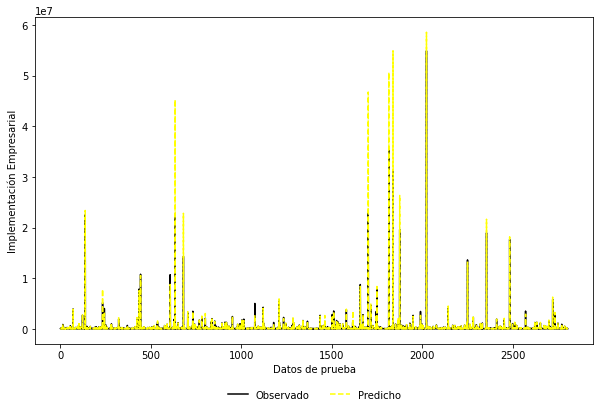

In [42]:
import matplotlib.pyplot as plt

# Ajustando los límites y parámetros
plt.rcParams['figure.figsize'] = (10, 6)
x_ax = range(len(X_test))

# Graficando
plt.plot(x_ax, y_test, label='Observado', color='k', linestyle='-')
plt.plot(x_ax, ytest_pred, label='Predicho', color='yellow', linestyle='--')
plt.ylabel('Implementación Empresarial')
plt.xlabel('Datos de prueba')
plt.legend(bbox_to_anchor=(0.5, -0.2), loc='lower center', ncol=2, frameon=False)
plt.show()


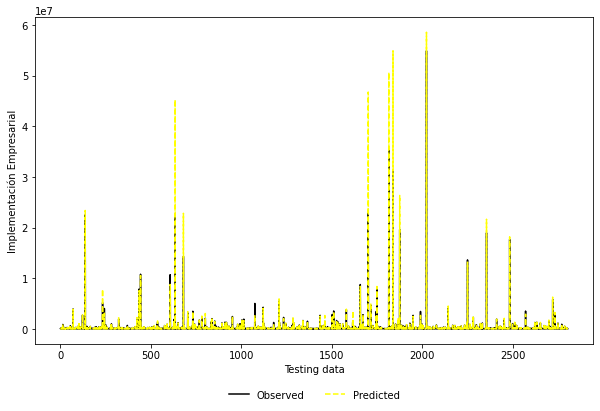

In [40]:
# Plotting the observed and predicted data
import matplotlib.pyplot as plt

#Setting the boundaries and parameters
plt.rcParams['figure.figsize'] = (10,6)
x_ax = range(len(X_test))
#Plotting
plt.plot(x_ax, y_test, label = 'Observed', color = 'k', linestyle = '-')
plt.plot(x_ax, ytest_pred, label = 'Predicted', color = 'yellow', linestyle = '--')
plt.ylabel('Implementación Empresarial')
plt.xlabel('Testing data')
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'lower center', ncol= 2, frameon = False)
plt.show()

In [76]:
# Plotting the prediction errors and residuals using yellowbrick

In [77]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


C:\Users\Alejandro Reyes\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


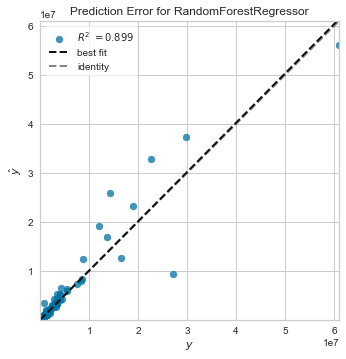

<AxesSubplot:title={'center':'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [78]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(tic1_2_rf)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

C:\Users\Alejandro Reyes\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


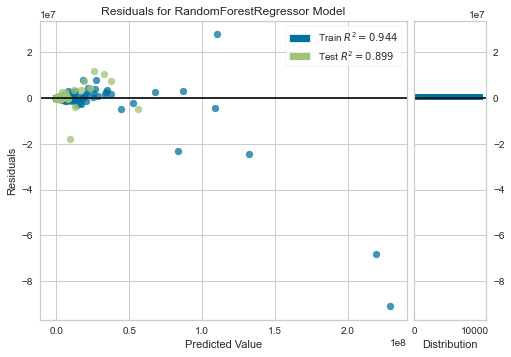

<AxesSubplot:title={'center':'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [79]:
# Plotting the residuals
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(tic1_2_rf)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

In [84]:
# The k-fold CV
from sklearn.model_selection import cross_val_score

In [85]:
# Training model CV
score_train = cross_val_score(tic1_2_rf, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 10)

In [86]:
score_train

array([-1.44562782e+12, -1.37477008e+12, -2.10503976e+11, -3.68816586e+10,
       -2.27868746e+11, -1.39466979e+12, -2.64160982e+11, -4.92269709e+13,
       -5.84599214e+10, -5.64432614e+13])

In [87]:
# The mean score
print(np.mean(score_train))

-11068317525408.604


In [88]:
# The absolute mean score
from numpy import absolute
print(absolute(np.mean(score_train)))

11068317525408.604


In [89]:
# The testing model CV
score_test = cross_val_score(tic1_2_rf, X_test, y_test, scoring = 'neg_mean_squared_error', cv = 10)

In [90]:
score_test

array([-2.05147474e+10, -1.13898498e+11, -1.91037872e+12, -1.05283628e+11,
       -9.19410154e+11, -3.71841020e+11, -2.98235583e+11, -2.39587786e+11,
       -8.57436646e+12, -1.38443909e+10])

In [91]:
print(np.mean(score_test))

-1256736099037.3406


In [92]:
# The absolute mean score
from numpy import absolute
print(absolute(np.mean(score_test)))

1256736099037.3406


In [100]:
# Random Forest Feature Ranking
from sklearn.pipeline import Pipeline

In [101]:
f_list = list(X.columns)
f_importance = pd.Series(tic1_2_rf.feature_importances_, index = f_list). sort_values(ascending = False)

In [102]:
print(f_importance)

tic1_3b           4.923136e-01
tic1_3a           2.239838e-01
tic1_3d           2.041752e-01
tic4_1a           1.425714e-02
Total_Personal    9.567320e-03
Total_Espec       8.438040e-03
Año               6.280190e-03
tic2_3            6.277922e-03
tic4_1b           6.008699e-03
tic4_2e           5.238372e-03
tic2_2_1a         4.214105e-03
tic3_1_2d         3.631341e-03
tic3_1            2.508970e-03
tic4_2a           2.357267e-03
tic3_1_2c         1.927833e-03
tic4_2c           1.570634e-03
tic2_6i           1.433328e-03
tic1_3c           1.112407e-03
tic5_1a           8.190783e-04
tic4_1d           6.493181e-04
tic2_2_1b         5.949560e-04
tic2_8_2c         3.688596e-04
tic4_2b           3.188690e-04
tic5_1d           3.154924e-04
tic6_2a           2.276494e-04
tic5_1b           2.118572e-04
tic3_1_2e         1.787928e-04
tic2_6d           1.781240e-04
tic3_2            1.586875e-04
tic4_1e           1.166443e-04
tic6_2b           9.663652e-05
tic5_1h           7.191204e-05
tic3_1_2

In [103]:
import pandas as pd

f_list = list(X.columns)
f_importance = pd.Series(tic1_2_rf.feature_importances_, index=f_list).sort_values(ascending=False)

top_5_values = f_importance.head(5)
print(top_5_values)

tic1_3b           0.492314
tic1_3a           0.223984
tic1_3d           0.204175
tic4_1a           0.014257
Total_Personal    0.009567
dtype: float64


In [75]:
from sklearn.ensemble import RandomForestRegressor

# Supongamos que tienes una matriz 'X' con tus variables predictoras y un vector 'y' con la variable objetivo.

# Crear una instancia del modelo de Random Forest
model = RandomForestRegressor()

# Ajustar el modelo a tus datos
model.fit(X, y)

# Obtener las importancias de las variables
importances = model.feature_importances_

# Crear una lista de tuplas (variable, importancia)
feature_importances = list(zip(X.columns, importances))

# Ordenar las importancias en orden ascendente
feature_importances.sort(key=lambda x: x[1])

# Imprimir las importancias de cada variable en orden ascendente
for feature, importance in feature_importances:
    print(f"{feature}: {importance}")

tic2_6a: 6.5751822759709305e-09
des_tamano: 7.080723064721736e-07
tic2_2_1c: 1.3512491550722494e-06
tic4_4c: 2.5713109836538455e-06
tic5_1f: 3.399564503507402e-06
tic6_1: 3.908282429952571e-06
tic2_6b: 5.480451603444247e-06
tic4_4d: 5.680375447858374e-06
tic2_6k: 6.092567489834255e-06
tic2_6f: 6.921267966863183e-06
tic2_8: 7.599580801049207e-06
tic2_6h: 1.2358832983805253e-05
tic5_1a: 1.3195786361632988e-05
tic4_4f: 1.5100420876893271e-05
tic4_4a: 1.5324441334640143e-05
tic4_4h: 2.358671432171602e-05
tic5_1h: 4.809035856426425e-05
tic2_6g: 5.170454920330571e-05
tic4_4b: 6.598605921826445e-05
tic4_4g: 7.046273987497261e-05
tic4_4e: 7.247936149148705e-05
tic2_3: 7.441429421599424e-05
tic2_8_2b: 7.52742800423232e-05
tic3_1_2e: 0.00012162100728511089
tic2_6i: 0.00013985416018904285
tic3_1_2c: 0.00015147192487158638
tic2_6c: 0.0001577988376440261
tic4_2c: 0.00019574691430024812
tic4_2a: 0.0005008447891713253
tic4_1d: 0.0006748548010769657
tic3_1_2f: 0.0007741580474201579
tic3_1_2d: 0.000851

In [11]:
# Obtener la columna 'tic1_2'
tic1_2 = df['tic1_2']

# Eliminar la columna 'tic1_2' del DataFrame
df.drop('tic1_2', axis=1, inplace=True)

# Agregar la columna 'tic1_2' al final del DataFrame
df['tic1_2'] = tic1_2

In [12]:
df

,des_tamano,tic1_3a,tic1_3b,tic1_3c,tic1_3d,tic2_2_1a,tic2_2_1b,tic2_2_1c,tic2_3,tic2_6a,...,tic5_1f,tic5_1h,tic6_1,tic6_2a,tic6_2b,tic6_2c,Año,Total_Personal,Total_Espec,tic1_2
0,2,0,3481,0,0,2,2,1,1,1,...,2,2,2,2,2,1,2016,2,0,3481
1,0,600,360,240,0,1,2,2,2,1,...,2,1,2,2,2,1,2016,2,0,1200
2,2,4761,0,0,0,2,2,1,2,1,...,1,1,2,2,2,1,2016,8,0,4761
3,2,31598,0,0,0,2,1,2,2,1,...,1,2,2,2,2,1,2016,1,0,31598
4,1,101277,0,0,0,2,2,1,2,1,...,1,2,2,2,2,1,2016,3,0,101277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14024,0,0,33388,0,0,2,2,1,1,1,...,1,1,2,2,1,2,2021,3,0,33388
14025,0,16359,10459,0,0,2,2,1,1,1,...,1,1,1,2,2,1,2021,21,1,26819
14026,1,10506,0,0,0,2,2,1,2,1,...,1,2,2,2,2,1,2021,60,0,10506
14027,0,196,1985,0,0,2,2,1,1,1,...,1,2,2,2,1,2,2021,22,0,2182


In [20]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
# cambiar valores de acuerdo al numero de columnas en el dataset
rf.fit(df.iloc[:, 0:54], df.iloc[:,54])

RandomForestClassifier()

Text(0.5, 0, 'Random Forest Feature Importance')

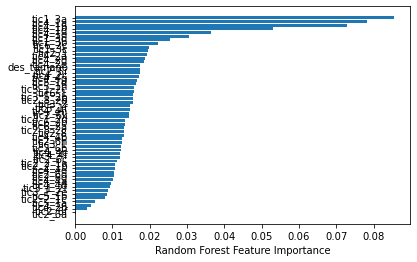

In [21]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(df.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

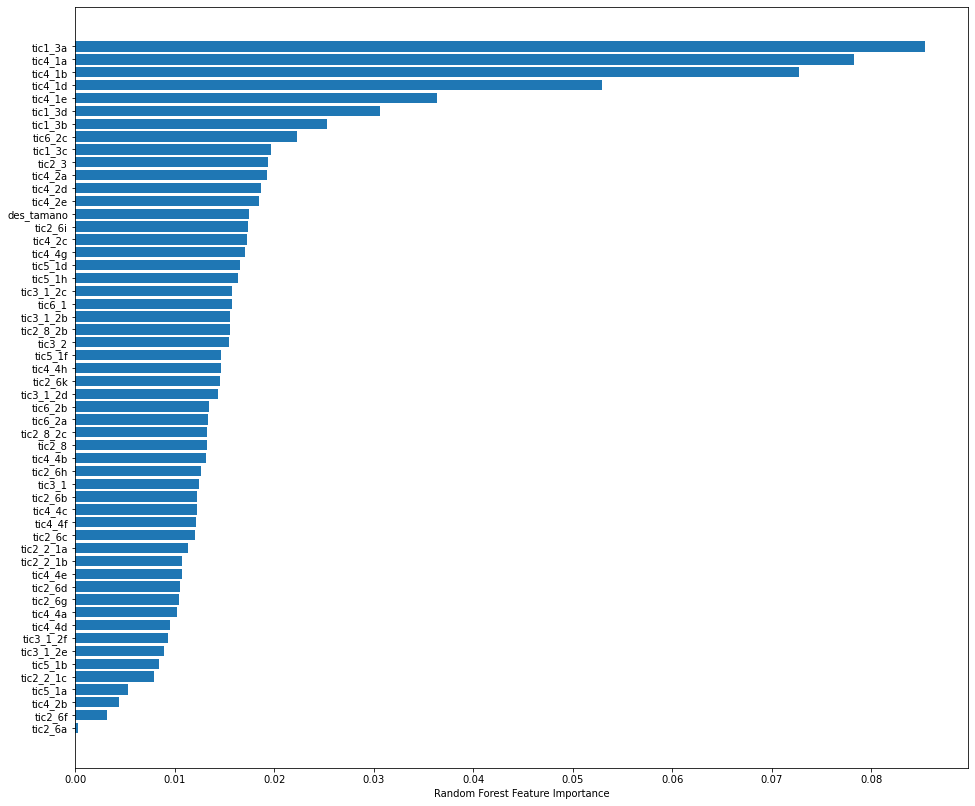

In [22]:
plt.figure(figsize=(16, 14))  # Ajusta el tamaño de la figura según tus preferencias
sorted_idx = rf.feature_importances_.argsort()
plt.barh(df.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

plt.show()